In [1]:
def weighted_choice_sub(weights):
    rnd = random.random() * sum(weights)
    for i, w in enumerate(weights):
        rnd -= w
        if rnd < 0:
            return i

In [2]:
def get_indices(weights, X, N):
    indices = []
    size = 0
    while size != N:
        idx = weighted_choice_sub(weights)
        #print idx
        if idx not in indices:
            too_small = False
            for x in X[idx]: 
                if abs(x) < 0.0001: 
                    too_small = True
                    break
            if too_small: continue
            indices.append(idx)
            size += 1
    return indices

In [17]:
def normalize(X):
    X_norm = []
    for i, x in enumerate(X):
        total = sum(x)
        v = [x_i / float(total) for x_i in x]
        if i % 250000 == 0: 
            print(x)
            print("/-----/")
            print(v)
        X_norm.append(v)
    return np.array(X_norm)

In [4]:
import gensim, logging
import numpy as np

In [6]:
model = gensim.models.Word2Vec.load('cikm_training_model.txt')

In [7]:
X = np.loadtxt("cikm_training_scores.csv")

In [8]:
labels = np.genfromtxt("cikm_training_words.csv", dtype=str)

In [9]:
weighted_idx = [ model.vocab[l].count for l in labels ]

In [10]:
import random
random.seed(587458)
indices = get_indices(weighted_idx, X, 3000)
#indices = np.random.random_integers(0,len(labels) - 1,1000)

In [11]:
## check for doubles
count = {}
for i in indices:
    if i not in count.keys():
        count[i] = 1
    else:
        count[i] +=1
        if count[i] > 1:
            print(str(i) + " is duplicated!!")

In [12]:
X_sub = X[indices]

In [13]:
for i, x in enumerate(X_sub):
    for xi in x: 
        if abs(xi) <= 0.0001: 
            if i in indices:
                print(str(i) + " is in indices")

In [14]:
labels_sub = labels[indices]

In [15]:
import tsne

In [16]:
Y = tsne.tsne(X_sub, 2, 50, 20.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  3000 ...
Computing P-values for point  500  of  3000 ...
Computing P-values for point  1000  of  3000 ...
Computing P-values for point  1500  of  3000 ...
Computing P-values for point  2000  of  3000 ...
Computing P-values for point  2500  of  3000 ...
Mean value of sigma:  3.11371005086
Iteration  10 : error is  18.1589429849
Iteration  20 : error is  18.132560685
Iteration  30 : error is  17.8417772097
Iteration  40 : error is  17.8419237879
Iteration  50 : error is  17.8780200571
Iteration  60 : error is  17.8553258233
Iteration  70 : error is  17.8571141618
Iteration  80 : error is  17.8595541403
Iteration  90 : error is  17.8575411509
Iteration  100 : error is  17.8575222544
Iteration  110 : error is  2.50724527484
Iteration  120 : error is  2.17228909888
Iteration  130 : error is  2.05761168524
Iteration  140 : error is  1.99025765279
Iteration  150 : error is  1.94230145534
I

In [28]:
from sklearn.cluster import AffinityPropagation,KMeans,MiniBatchKMeans
from sklearn.mixture import GMM, DPGMM
#y_sub = AffinityPropagation(damping=0.6).fit_predict(X_sub)
y_sub = KMeans(n_clusters=15).fit_predict(X_sub)
#y_sub = MiniBatchKMeans(n_clusters=30, batch_size=500).fit_predict(X_sn)
#y_sub = DPGMM(n_components=30,covariance_type='diag',alpha=25.0,n_iter=100).fit_predict(X_sn)
#y_sub = GMM(n_components=30,covariance_type='diag',n_iter=100).fit_predict(X_sn)

In [29]:
clusters = {}
for i, v in enumerate(y_sub):
    if v in clusters:
        clusters[v].append(i)
    else:
        l = []
        l.append(i)
        clusters[v] = l

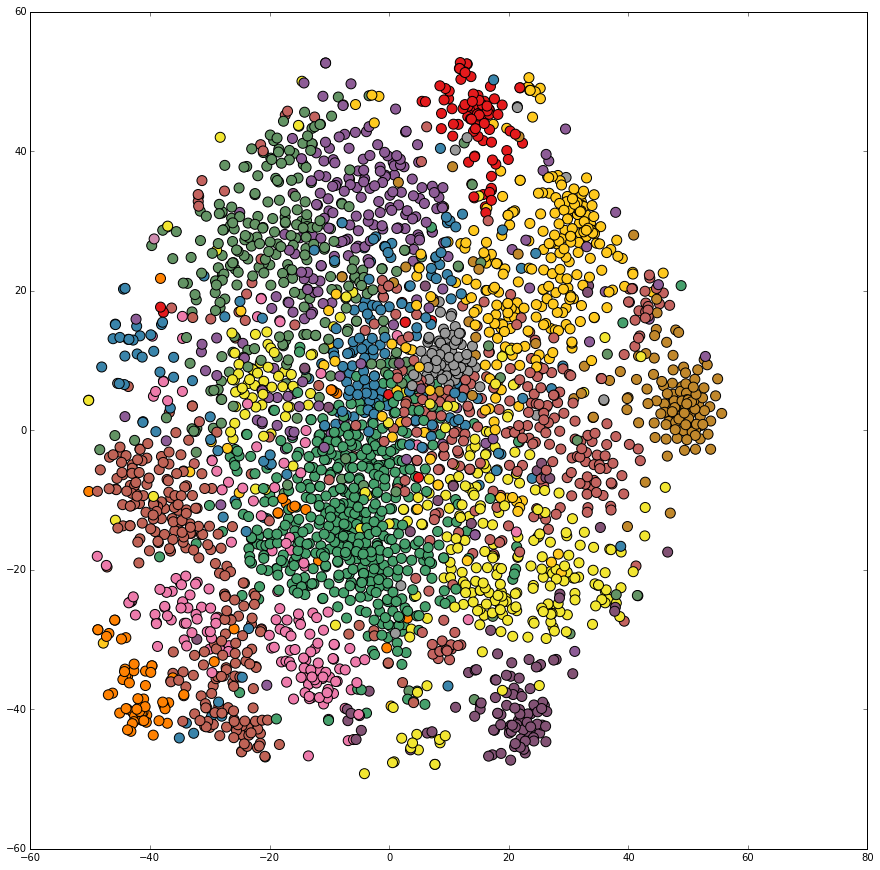

In [30]:
#plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
cmin = min(y_sub)
cmax = max(y_sub)
cnorm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)

plt.figure(figsize=(15, 15))
# only turn off after checking the axis min/max
#plt.axis('off')
plt.scatter(Y[:,0], Y[:,1], s=100, c=y_sub, cmap=plt.cm.get_cmap('Set1'), norm=cnorm, alpha=1.0)

#for i in range(len(Y[:,0])):
#    plt.annotate(labels_sub[i], (Y[i,0], Y[i,1]))

#plt.savefig('tsne_annotated.png',bbox_inches='tight')
#plt.savefig('tsne_KMeans.png',bbox_inches='tight')

In [84]:
#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

for k, v in clusters.iteritems():
    cmin = min(v)
    cmax = max(v)
    cnorm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)

    Y_idx = Y[v]
    labels_idx = labels[v]
    
    fig = plt.figure(figsize=(25,25))
    # only turn off after checking the axis min/max
    #plt.axis('off')
    plt.scatter(Y_idx[:,0], Y_idx[:,1], s=100, c=np.random.rand(3,1), alpha=1.0)

    for i in range(len(Y_idx[:,0])):
        plt.annotate(labels_idx[i], (Y_idx[i,0], Y_idx[i,1]))

    #plt.savefig('tsne_annotated.png',bbox_inches='tight')
    plt.savefig('clusters/tsne_DPGMM_' + str(k) + '.png',bbox_inches='tight')
    fig = plt.close(fig)